In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
%matplotlib inline
%config IPCompleter.greedy=True


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sowjanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sowjanya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sowjanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sowjanya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
data = pd.read_csv('spam_ham_dataset.csv')

In [4]:
display(data.head())

# Display the summary statistics
display(data.describe())

# Print the info
print(data.info())

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None


In [5]:
print(data['label'].value_counts())

print()

# Print the proportions of each category
print(data['label'].value_counts(normalize=True))

# Visualize the Categories
sns.countplot(data['label'])
plt.title("label Counts")
plt.show()

ham     3672
spam    1499
Name: label, dtype: int64

ham     0.710114
spam    0.289886
Name: label, dtype: float64
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Sowjanya\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Sowjanya\AppData\Local\Temp\ipykernel_3248\1778347890.py", line 9, in <module>
    sns.countplot(data['label'])
  File "c:\Users\Sowjanya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py", line 2942, in countplot
    plotter = _CountPlotter(
  File "c:\Users\Sowjanya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py", line 1530, in __init__
    self.establish_variables(x, y, hue, data, orient,
  File "c:\Users\Sowjanya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py", line 516, in establish_variables
    plot_data = [np.asarray(d, float) for d in plot_data]
  File "c:\Users\Sowjanya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\

In [6]:
le = LabelEncoder()

# Encode the categories
data['label_enc'] = le.fit_transform(data['label'])

# Display the first five rows again to see the result
display(data.head())

# Print the datatypes
print(data.dtypes)

,Unnamed: 0,label,text,label_num,label_enc
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0


Unnamed: 0     int64
label         object
text          object
label_num      int64
label_enc      int32
dtype: object


In [7]:
data['word_count'] = data['text'].str.split().str.len()

# Print the average number of words in each category
print(data.groupby('label')['word_count'].mean())


label
ham     225.214325
spam    234.077385
Name: word_count, dtype: float64


In [8]:
tokenized_messages = data['text'].str.lower().apply(word_tokenize)

# Print the tokens to see how it looks like
print(tokenized_messages)

0       [subject, :, enron, methanol, ;, meter, #, :, ...
1       [subject, :, hpl, nom, for, january, 9, ,, 200...
2       [subject, :, neon, retreat, ho, ho, ho, ,, we,...
3       [subject, :, photoshop, ,, windows, ,, office,...
4       [subject, :, re, :, indian, springs, this, dea...
                              ...                        
5166    [subject, :, put, the, 10, on, the, ft, the, t...
5167    [subject, :, 3, /, 4, /, 2000, and, following,...
5168    [subject, :, calpine, daily, gas, nomination, ...
5169    [subject, :, industrial, worksheets, for, augu...
5170    [subject, :, important, online, banking, alert...
Name: text, Length: 5171, dtype: object


In [9]:
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        if str.isalpha(token) or token in ['n\'t','won\'t']:
            if token=='n\'t':
                alpha.append('not')
                continue
            elif token == 'won\'t':
                alpha.append('wont')
                continue
            alpha.append(token)
    return alpha

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(alpha)

print(tokenized_messages)

0       [subject, enron, methanol, meter, this, is, a,...
1       [subject, hpl, nom, for, january, see, attache...
2       [subject, neon, retreat, ho, ho, ho, we, re, a...
3       [subject, photoshop, windows, office, cheap, m...
4       [subject, re, indian, springs, this, deal, is,...
                              ...                        
5166    [subject, put, the, on, the, ft, the, transpor...
5167    [subject, and, following, noms, hpl, can, t, t...
5168    [subject, calpine, daily, gas, nomination, jul...
5169    [subject, industrial, worksheets, for, august,...
5170    [subject, important, online, banking, alert, d...
Name: text, Length: 5171, dtype: object


In [10]:
def remove_stop_words(tokens):
    """This function removes all stop words in terms of nltk stopwords"""
    no_stop = []
    for token in tokens:
        if token not in stopwords.words('english'):
            no_stop.append(token)
    return no_stop

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(remove_stop_words)

print(tokenized_messages)

0       [subject, enron, methanol, meter, follow, note...
1       [subject, hpl, nom, january, see, attached, fi...
2       [subject, neon, retreat, ho, ho, ho, around, w...
3       [subject, photoshop, windows, office, cheap, m...
4       [subject, indian, springs, deal, book, teco, p...
                              ...                        
5166    [subject, put, ft, transport, volumes, decreas...
5167    [subject, following, noms, hpl, take, extra, m...
5168    [subject, calpine, daily, gas, nomination, jul...
5169    [subject, industrial, worksheets, august, acti...
5170    [subject, important, online, banking, alert, d...
Name: text, Length: 5171, dtype: object


In [11]:
def lemmatize(tokens):
    """This function lemmatize the messages"""
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Create the lemmatized list
    lemmatized = []
    for token in tokens:
            # Lemmatize and append
            lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(lemmatize)

print(tokenized_messages)

0       subject enron methanol meter follow note gave ...
1       subject hpl nom january see attached file hpln...
2       subject neon retreat ho ho ho around wonderful...
3       subject photoshop window office cheap main tre...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5166    subject put ft transport volume decreased cont...
5167    subject following noms hpl take extra mmcf wee...
5168    subject calpine daily gas nomination julie men...
5169    subject industrial worksheet august activity a...
5170    subject important online banking alert dear va...
Name: text, Length: 5171, dtype: object


In [12]:
# Replace the columns with tokenized messages
data['text'] = tokenized_messages

# Display the first five rows
display(data.head())

,Unnamed: 0,label,text,label_num,label_enc,word_count
0,605,ham,subject enron methanol meter follow note gave ...,0,0,67
1,2349,ham,subject hpl nom january see attached file hpln...,0,0,23
2,3624,ham,subject neon retreat ho ho ho around wonderful...,0,0,550
3,4685,spam,subject photoshop window office cheap main tre...,1,1,48
4,2030,ham,subject indian spring deal book teco pvr reven...,0,0,70


In [13]:
X = data['text']
y = data['label_enc']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

In [15]:
# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii')

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

In [16]:
# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the model
nb.fit(tfidf_train, y_train)



MultinomialNB()

In [17]:
print(y_pred)
X_test["Predict_MAP"] = y_pred

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Sowjanya\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Sowjanya\AppData\Local\Temp\ipykernel_3248\2610881946.py", line 1, in <module>
    print(y_pred)
NameError: name 'y_pred' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Sowjanya\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2052, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\Sowjanya\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Users\Sowjanya\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\ultratb.py", line 1006, i

In [18]:
y_pred = nb.predict(tfidf_test)

conf_matrix= confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(conf_matrix)
print(accuracy_score(y_test,y_pred))

Confusion Matrix

[[735   0]
 [ 93 207]]
0.9101449275362319


In [19]:
data["label"] = data["label"].map({'ham':1,'spam':0})

In [20]:
import itertools

In [21]:
def plot_confusion_matrix(conf_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(conf_matrix)

    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[735   0]
 [ 93 207]]


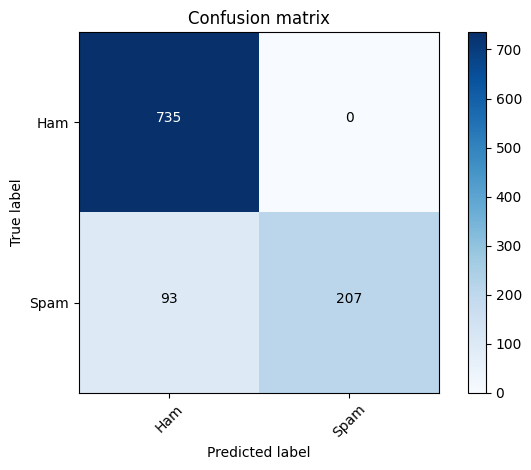

In [22]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['Ham','Spam'], normalize=False,
                      title='Confusion matrix')

In [23]:
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
    
# calculate accuracy
Accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
print(Accuracy)
# calculate the sensitivity
sensitivity = TP / float(FN + TP)
print(sensitivity)
# calculate the specificity
specificity = (TN / float(TN + FP))
print(specificity)




True Positives: 207
True Negatives: 735
False Positives: 0
False Negatives: 93
0.9101449275362319
0.69
1.0


In [24]:
from sklearn.svm import SVC
clf = SVC()

clf.fit(tfidf_train,y_train)
decision_threshold = clf.decision_function(tfidf_test)

precision, recall, threshold = precision_recall_curve(y_test,decision_threshold)



Text(0.5, 1.0, 'Thershold Vs Sensitivity')

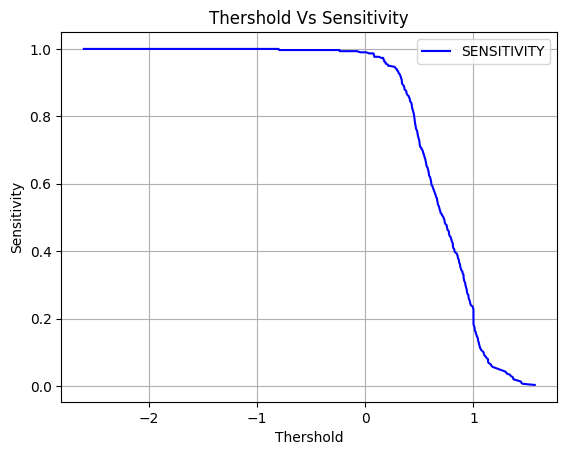

In [25]:
#plotting Sensitivity
plt.plot(threshold,recall[:-1],c='b',label = 'SENSITIVITY')
plt.grid()
plt.legend()
plt.xlabel('Thershold')
plt.ylabel('Sensitivity')
plt.title('Thershold Vs Sensitivity')

Text(0.5, 1.0, 'Thershold Vs Accuracy')

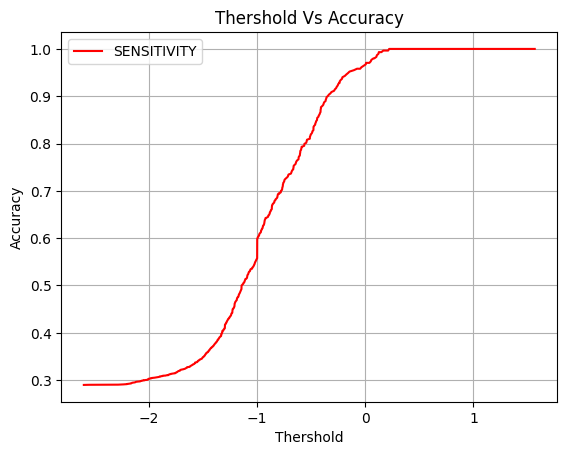

In [26]:
#plotting Sensitivity
plt.plot(threshold,precision[:-1],c='r',label = 'SENSITIVITY')
plt.grid()
plt.legend()
plt.xlabel('Thershold')
plt.ylabel('Accuracy')
plt.title('Thershold Vs Accuracy')

Text(0.5, 1.0, 'Thershold Vs Specificity ')

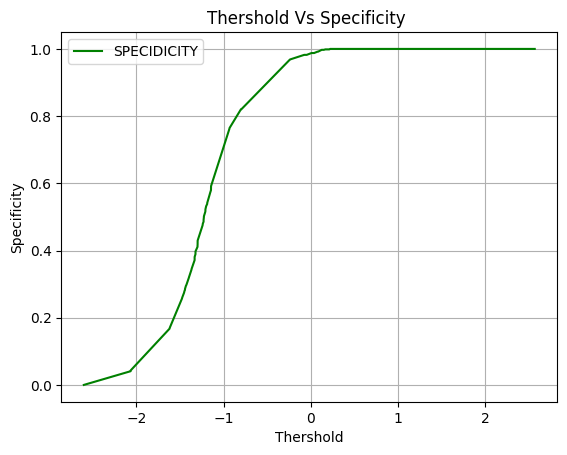

In [27]:
#plotting specificity 
from sklearn.metrics import roc_curve,auc 
false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,decision_threshold)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(threshold,(1-false_positive_rate),c='g',label = 'SPECIDICITY')
plt.xlabel('Thershold')
plt.ylabel('Specificity')
plt.grid()
plt.legend()
plt.title('Thershold Vs Specificity ')
